<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data cleaning 

The original COVID-19 dataset was obtained from [Kaggle](https://www.kaggle.com/code/evanepstein/europe-covid-19-cases-exploratory-analysis/data). Some values were removed to create a dataset for this lesson.

Access the messy COVID-19 dataset from my [Github Repo ](https://https://github.com/IndraniMandal/ds-assets/blob/main/assets/messy_covid19_southamerica%20-%20covid19_southamerica.csv)


1. Examine the dataset for missing values. 

2. Which column has the maximum missing value? What % value is missing in that column? Should you keep this column or drop it? Why? 

3. There are some columns with only a few data points missing. Should you drop these columns too? Why or why not? 

4. How should you handle these specific data points(particular row)? 

5. There are some data that has incorrect information like instead of a number they might have strings. How are you handling these data points(rows)? 

6. After you have cleaned your data, create a plot, or print out the top 10 countries with the most number of confirmed cases.
Submission: Dataset after cleaning and Google Colab notebook. 

#Load Data

In [1]:
import pandas as pd, numpy as np 
# import csv file as a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/messy_covid19_southamerica%20-%20covid19_southamerica.csv')

In [2]:
df.head()


,ObservationDate,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
0,2020-01-23,Mexico,NaN,0.0,0,0,0.0
1,2020-01-23,Brazil,NaN,0.0,0,0,0.0
2,2020-01-23,Colombia,NaN,0.0,0,0,0.0
3,2020-02-26,Brazil,NaN,1.0,0,0,1.0
4,2020-02-26,Brazil,NaN,1.0,0,0,1.0


# Missing values
Let's check if the data has any missing values. If so, how can we handle it?

In [3]:
df.isnull().sum()

ObservationDate       0
Country_Region        0
Province_State     5989
Confirmed             1
Deaths                3
Recovered             2
Active               26
dtype: int64

We notice the Province_State column has alot of missing values.  Let's compte the number and perectage of missing values in this column.

In [4]:
x = df.Province_State.isnull().values.sum() 
x

5989

In [5]:
x/df.shape[0] 

0.25870410367170626

25.8% of the vaules in t are mhe Province_State column is missing. We notice the state or province does not provide much information for any predictive analysis. There is no way to infer the missing values from that data that we have so it is better to just drop it.

In [6]:
df = df.drop('Province_State', axis=1)

Now let's look at other columns, we can see they have less NaNs than the Province state column.


In [7]:
df.Confirmed[df.Confirmed.isnull()] # missing values in the number of Confirmed cases

106   NaN
Name: Confirmed, dtype: float64

In [8]:
df.Deaths[df.Deaths.isnull()]# missing vaues in the number of Deaths
    

10     NaN
41     NaN
106    NaN
Name: Deaths, dtype: object

The number of deaths should have been a numeric value. We notics the data type of the column is not numeric. There are some non numeric values in some of the rows for this column, the `to_numeric` function will force anything that cannot be convereted
to a number to be a `NaN`



In [9]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')    

In [10]:
df.Deaths[df.Deaths.isnull()]

10    NaN
22    NaN
41    NaN
106   NaN
Name: Deaths, dtype: float64

We notice we have one more `NaN`. There must have been some non-numeric value that could not be converted to a number and has a NaN value now. The data type of the column is numeric so that's good news.
Let's check the `Recovered` column.

In [11]:
df.Recovered[df.Recovered.isnull()] # wcheck for missing values in this column

10    NaN
41    NaN
Name: Recovered, dtype: object

Tthere is non numric data in this column we use the `to_numeric` function to force everything to become a number, if it cant then it is replaced with `NAN`

In [12]:
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce')

In [13]:
df.Recovered[df.Recovered.isnull()]

10    NaN
32    NaN
41    NaN
66    NaN
106   NaN
Name: Recovered, dtype: float64

We found a couple of non-numeric values. Let's check the `Active` column.

In [14]:
df.Active[df.Active.isnull()]# we can look at the missing rows in this column

41      NaN
11507   NaN
12819   NaN
15279   NaN
18463   NaN
19441   NaN
19604   NaN
19767   NaN
19930   NaN
20093   NaN
20256   NaN
20419   NaN
20582   NaN
20745   NaN
20908   NaN
21071   NaN
21397   NaN
21560   NaN
21723   NaN
21886   NaN
22050   NaN
22214   NaN
22378   NaN
22542   NaN
22706   NaN
22870   NaN
Name: Active, dtype: float64

Above we see the other columns that also have missing data. I would not remove they are not missing that many data points and the value can be infered from the rest of the data. We can use the average for the column to fill in the missing values. For str values I used the `to_numeric` function to remove them. 

# Data Imputation
There are different ways of handling missing data. 
## Imputation Using (Mean/Median) Values
This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.
We are going to replace the missing values by the mean of this column.

In [15]:
df['Confirmed'].fillna(df['Confirmed'].mean(), inplace=True)#replaces NaN's with the mean
df.Confirmed[df.Confirmed.isnull()]#check to make sure there are no NaNs left

Series([], Name: Confirmed, dtype: float64)

In [16]:
df['Deaths'].fillna(df['Deaths'].median(), inplace=True)#replaces NaN's with the median
df.Deaths[df.Deaths.isnull()]

Series([], Name: Deaths, dtype: float64)

##Imputation Using (Most Frequent) or (Zero/Constant) Values
Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

##Imputation Using k-NN
The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood.

Imputation doesn't work for non-numeric columns. So let's separate the numeric columns from the non-numeirc ones.

In [17]:
v = df.loc[:, df.columns.difference(['ObservationDate', 'Country_Region'])]
v

,Active,Confirmed,Deaths,Recovered
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0
...,...,...,...,...
23145,0.0,64.0,0.0,64.0
23146,67.0,4836.0,102.0,4667.0
23147,2039.0,4386.0,72.0,2275.0
23148,208.0,2010.0,47.0,1755.0


In [18]:
# import the SimpleImputer class
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
clean_df = imputer.fit_transform(v)

In [19]:
clean_df

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       ...,
       [2.0390e+03, 4.3860e+03, 7.2000e+01, 2.2750e+03],
       [2.0800e+02, 2.0100e+03, 4.7000e+01, 1.7550e+03],
       [9.5680e+03, 7.3528e+04, 6.1400e+02, 6.3346e+04]])

The transformed data is no longer a dataframe, it's a numpy array. We have to convert it back to a dataframe and concat it with the non-numeric columns.

In [20]:
clean_df = pd.DataFrame(clean_df, columns= ['Active',	'Confirmed', 'Deaths','Recovered'])
clean_df.head()

,Active,Confirmed,Deaths,Recovered
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0


The non-numeric columns were the `ObservationDate` and `Country_Region`.

In [21]:
df.loc[ : ,'ObservationDate': 'Country_Region']

,ObservationDate,Country_Region
0,2020-01-23,Mexico
1,2020-01-23,Brazil
2,2020-01-23,Colombia
3,2020-02-26,Brazil
4,2020-02-26,Brazil
...,...,...
23145,2020-09-28,Saint Vincent and the Grenadines
23146,2020-09-28,Suriname
23147,2020-09-28,Trinidad and Tobago
23148,2020-09-28,Uruguay


Let's concatinate the data along the columns(`axis =1`).

In [22]:
transformed_df = pd.concat([df.loc[ : , 'ObservationDate': 'Country_Region'],clean_df ], axis=1)
transformed_df

,ObservationDate,Country_Region,Active,Confirmed,Deaths,Recovered
0,2020-01-23,Mexico,0.0,0.0,0.0,0.0
1,2020-01-23,Brazil,0.0,0.0,0.0,0.0
2,2020-01-23,Colombia,0.0,0.0,0.0,0.0
3,2020-02-26,Brazil,1.0,1.0,0.0,0.0
4,2020-02-26,Brazil,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
23145,2020-09-28,Saint Vincent and the Grenadines,0.0,64.0,0.0,64.0
23146,2020-09-28,Suriname,67.0,4836.0,102.0,4667.0
23147,2020-09-28,Trinidad and Tobago,2039.0,4386.0,72.0,2275.0
23148,2020-09-28,Uruguay,208.0,2010.0,47.0,1755.0


#Data Visualization of the Result

In [23]:
# import matplotlib so that we can draw a graph

%matplotlib inline
import matplotlib.pyplot as plt 


In [24]:
df=transformed_df.groupby('Country_Region')['Confirmed'].max()

In [25]:
df_sorted = df.sort_values(ascending = False)
top_ten = df_sorted[:10, ]

In [26]:
top_ten

Country_Region
Brazil                973142.0
Argentina             723132.0
Peru                  367068.0
Chile                 285939.0
Colombia              265576.0
Ecuador               134965.0
Bolivia               134223.0
Mexico                124314.0
Dominican Republic    111666.0
Panama                111277.0
Name: Confirmed, dtype: float64

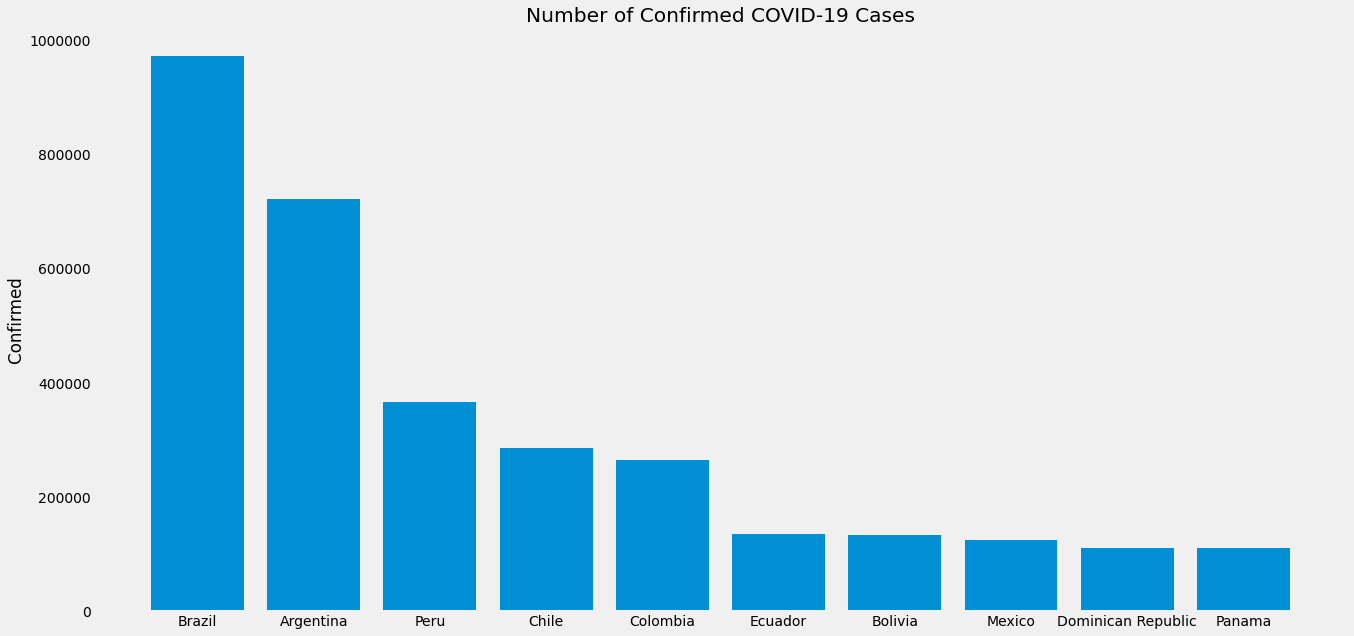

In [27]:
def my_plot():
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    
    ax.bar(top_ten.index, top_ten)
    ax.set(ylabel='Confirmed',
           title="Number of Confirmed COVID-19 Cases")
    
    ax.grid()
    
    ax.ticklabel_format(style='plain', axis='y')
    # this function removes scientific notation, if you get attribute error it is bc you forgot to specify an axis
    
my_plot()